In [1]:
from torch.utils.collect_env import main as check_torch
check_torch()

PyTorch version: 1.8.0
Is debug build: False
CUDA used to build PyTorch: None
ROCM used to build PyTorch: N/A

OS: macOS 10.14.6 (x86_64)
GCC version: Could not collect
Clang version: Could not collect
CMake version: Could not collect

Python version: 3.9 (64-bit runtime)
Is CUDA available: False
CUDA runtime version: No CUDA
GPU models and configuration: No CUDA
Nvidia driver version: No CUDA
cuDNN version: No CUDA
HIP runtime version: N/A
MIOpen runtime version: N/A

Versions of relevant libraries:
[pip3] numpy==1.21.0
[pip3] torch==1.8.0
[conda] libblas                   3.9.0                     8_mkl    conda-forge
[conda] libcblas                  3.9.0                     8_mkl    conda-forge
[conda] liblapack                 3.9.0                     8_mkl    conda-forge
[conda] mkl                       2020.4             h08c4f10_301    conda-forge
[conda] numpy                     1.21.0           py39h7eed0ac_0    conda-forge
[conda] pytorch                   1.8.0         

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import skorch
from sklearn.datasets import make_regression

n, d = 1000, 4

est = skorch.NeuralNetRegressor(
    module=nn.Linear,
    module__in_features=d,
    module__out_features=1,
    optimizer=optim.Adadelta,
)
X, y = make_regression(n_samples=n, n_features=d, random_state=42)
y = y.reshape(-1, 1).astype("float32")
X = X.astype("float32")
est.fit(X, y)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1    14822.4900    12915.7494  0.0120
      2    14822.4006    12915.6693  0.0112
      3    14822.3072    12915.5843  0.0125
      4    14822.2109    12915.4970  0.0126
      5    14822.1114    12915.4080  0.0135
      6    14822.0098    12915.3168  0.0119
      7    14821.9058    12915.2238  0.0129
      8    14821.8000    12915.1282  0.0127
      9    14821.6914    12915.0320  0.0128
     10    14821.5809    12914.9325  0.0124


<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=Linear(in_features=4, out_features=1, bias=True),
)

<AxesSubplot:xlabel='weights', ylabel='linear'>

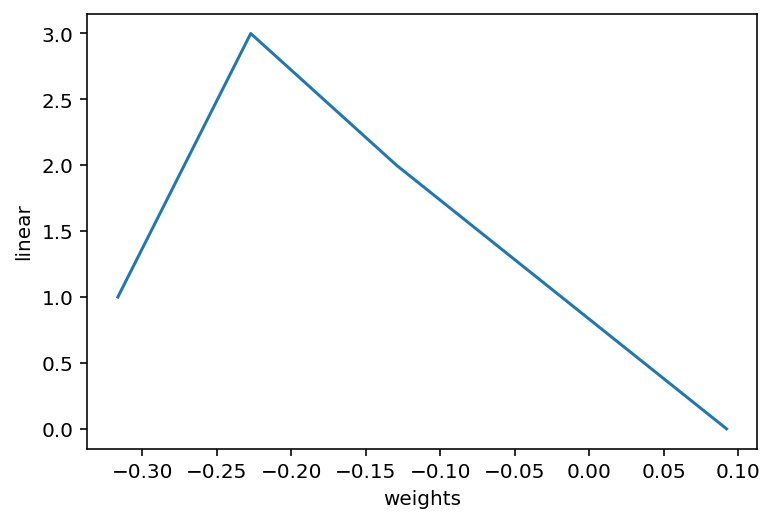

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

weights = est.module_.weight.detach().numpy().flatten()
df = pd.DataFrame({"weights": weights, "linear": np.arange(len(weights))})
sns.lineplot(data=df, x="weights", y="linear")